In [1]:
from scipy.interpolate import BSpline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
plt.rcParams['figure.figsize'] = (10, 8)

In [4]:
xs = np.linspace(-10, 10, 1000)

In [5]:
def base(x, i, t, k):
    """Base spline
    """
    if k == 0:
        return np.where((t[i] <= x) & (x < t[i + 1]), 1, 0)
    else:
        c1 = (x - t[i]) / (t[i + k] - t[i]) if t[i + k] > t[i] else 0
        c2 = (t[i + 1 + k] - x) / (t[i + 1 + k] - t[i + 1]) if t[i + 1 + k] > t[i + 1] else 0
        return c1 * base(x, i, t, k - 1) + c2 * base(x, i + 1, t, k - 1)

In [6]:
def getBSpline(t, c, k, extrapolate=False, plot=False):
    """plot a BSpline, together with its knots and control points/coefficients
    Parameters
    ----------
    t : ndarray, shape (n+k+1,)
        knots
    c : ndarray, shape (>=n, ...)
        spline coefficients
    k : int
        B-spline order
    """
    # get the spline function
    spline = BSpline(t, c, k, extrapolate)
    if not extrapolate:
        xs = np.linspace(np.min(t), np.max(t), 300)
    else:
        width = np.max(t) - np.min(t)
        if extrapolate is True:
            extrapolate = 0.5
        xs = np.linspace(np.min(t) - extrapolate * width, np.max(t) + extrapolate * width, 300)
    
    # plot the base splines
    bases = []
    # given t knots and dimension k, there are t - k - 1 base splines with dimension k - 1
    for i in range(len(t) - k - 1):
        # knots of base spline have length k + 1
        base_knots = t[i:i + k + 2]
        base = spline.basis_element(base_knots, extrapolate)
        bases.append(c[i] * base(xs))
        if plot:
            plt.plot(xs, c[i] * base(xs), 'g--', alpha=0.5)
    
    # plot the spline
    if plot:
        plt.plot(t, np.zeros_like(t), 'o')
    return xs, spline(xs), bases

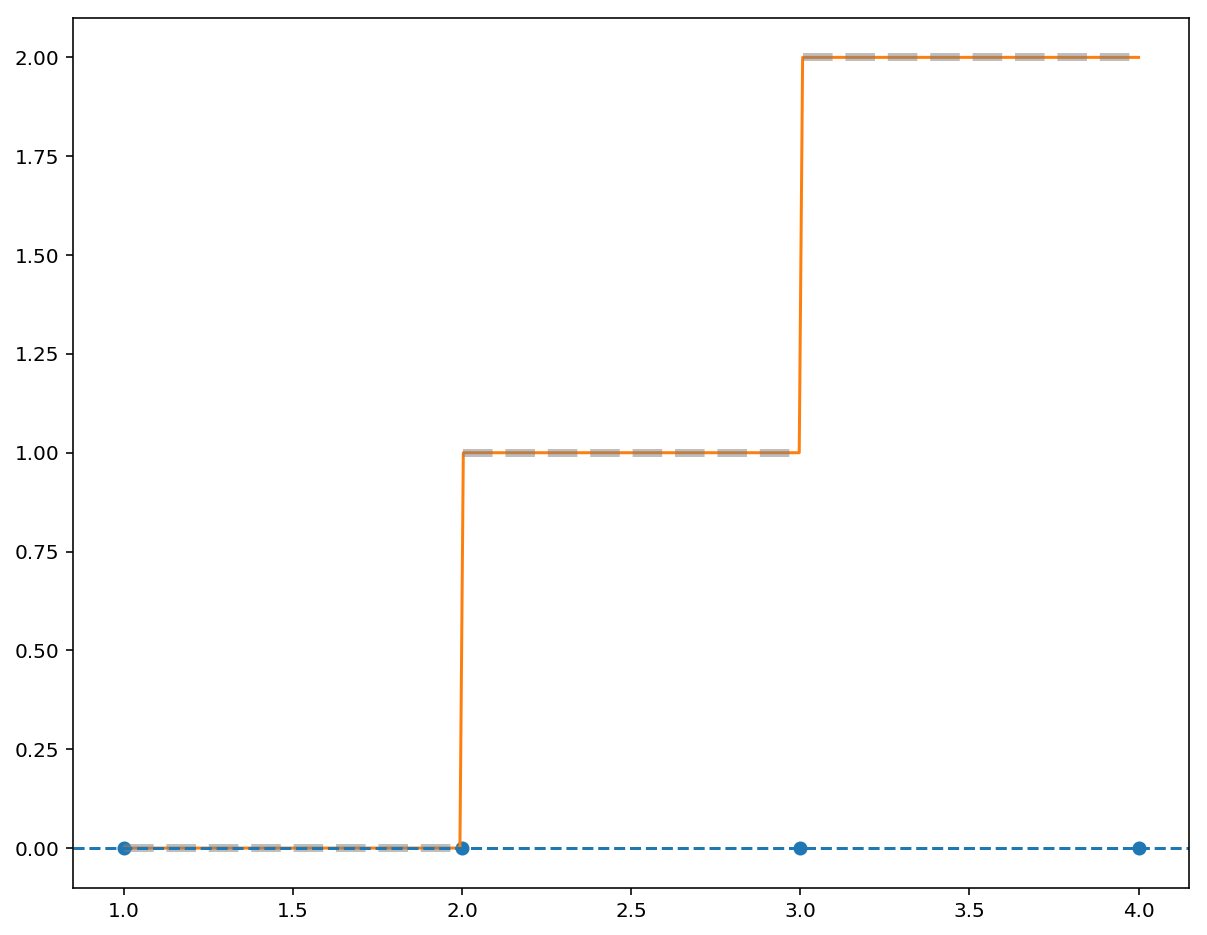

In [7]:
t = [1, 2, 3, 4]
xs, ys, bs = getBSpline(t, [0, 1, 2], 0)
plt.plot(t, np.zeros_like(t), 'o')
plt.plot(xs, ys)
for b in bs:
    plt.plot(xs, b, 'C7--', lw=4, alpha=0.5)
plt.axhline(color='C0', ls='--')
plt.show()

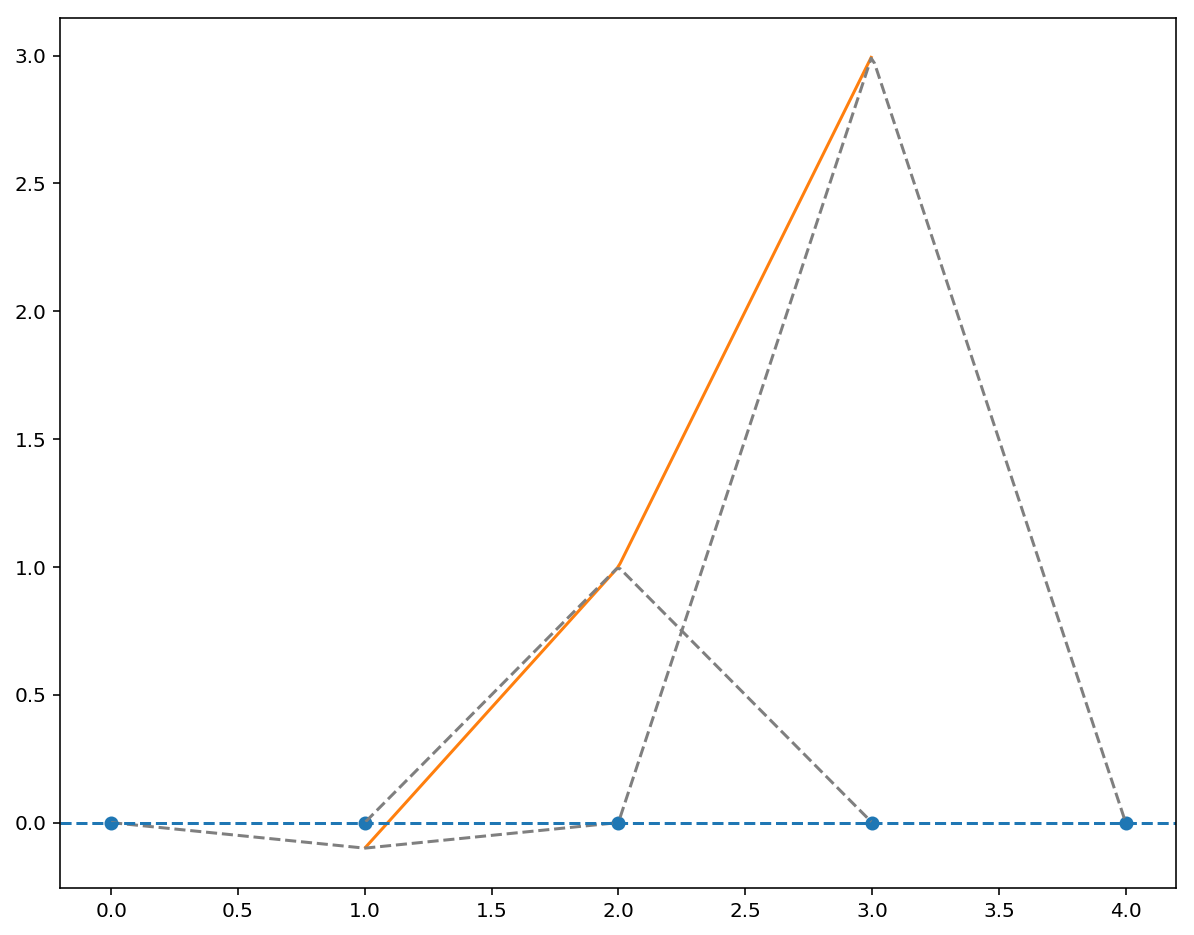

In [8]:
t = [0, 1, 2, 3, 4]
xs, ys, bs = getBSpline(t, [-0.1, 1, 3], 1)
plt.plot(t, np.zeros_like(t), 'o')
plt.plot(xs, ys)
for b in bs:
    plt.plot(xs, b, 'C7--')
plt.axhline(color='C0', ls='--')
plt.show()

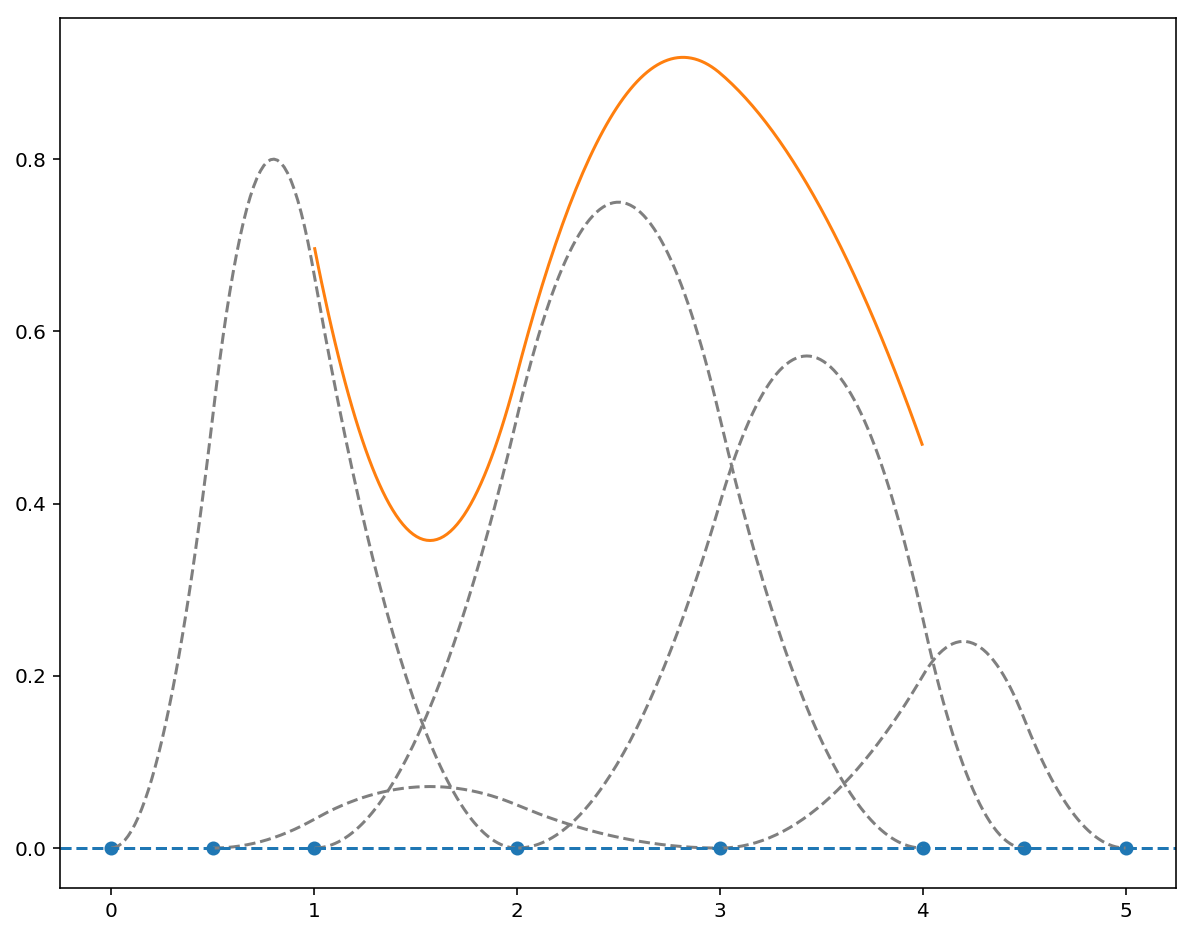

In [9]:
t = [0, 0.5, 1, 2, 3, 4, 4.5, 5]
c = [1, 0.1, 1, 0.8, 0.3]
xs, ys, bs = getBSpline(t, c, 2, extrapolate=False)
plt.plot(t, np.zeros_like(t), 'o')
plt.plot(xs, ys)
for b in bs:
    plt.plot(xs, b, 'C7--')
plt.axhline(color='C0', ls='--')
plt.show()